# Lab 7: Political Opinion Dynamics
### Approach: Network with repulsion and tie-changing

Here we'll be building on the model we constructed in class on 10/4. (You can reference what we got by downloading the Python notebooks from the relevant folder in the Lecture Materials section of Files on the course Canvas page.)

Importing everything:

In [68]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import IPython.display as display

Still keeping our little helper function that we can make use of to clean up networkx's awkwardness:

In [69]:
#helper function to make a list of state attributes
#this could get messed up (order desynced with node labels) if the node indices aren't in order
def getStates(G):
  states = []
  for i in G.nodes:
    states.append(G.nodes[i]['state'])

  return states

Here's our good ol' plotting function: it colors nodes accoring to the 'state' variable, with a colorbar.  Feel free to play around with this (different layouts, more edge/node options, etc.)!

In [70]:
#show the graph G and color nodes according to their 'opinion', in the attribute 'state'
def myDraw(G, t=0):

  #make list of states for all the nodes
  #note: this could get messed up if the node indices aren't in order, since the states are appended in the order they're visited, not based on their "name"/index itself
  states = []
  for i in G.nodes:
    states.append(G.nodes[i]['state'])

  #choose a layout
  #myPos = nx.kamada_kawai_layout(G)
  #myPos = nx.spring_layout(G, seed = 1)
  myPos = nx.circular_layout(G)

  fig = plt.figure(0)
  #this (or a nx.draw() command) will draw the network all at once, but wouldn't let us make a colorbar for interpreting what the colors mean
  #full = nx.draw_networkx(G, pos = myPos, with_labels = True, font_size = 22, node_size = 1000, width = 3, node_color = states, cmap=plt.cm.plasma)

  #rigamarole to have colorbar based on node info

  nodes = nx.draw_networkx_nodes(G, pos = myPos, node_color = states, cmap=plt.cm.cool, vmin = -1, vmax = 1, node_size = 1000)
  edges = nx.draw_networkx_edges(G, pos = myPos, width = 3)
  nodelabels = nx.draw_networkx_labels(G, myPos, font_size = 22)

  plt.title('time: '+str(t))
  fig.set_figwidth(10)
  fig.set_figheight(6)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()

# Problem 1: Goblin Mode (7 points)
Let's practice searching for figuring out plotting commands, by making a function called `badDraw` which does the same thing as `myDraw`, but worse!

### a) (2 points) Search "matplotlib colormaps" on the search engine of your choice. Find one that's **bad** for this purpose. Why is it bad?

***Double click*** and write down your response here!

One colormap that would be considered bad for this purpose would be the the "prism" colormap. The "prism" map consists of repeated cycles of colors and two nodes with the same color might have different state values. This can be confusing because same color can represent multiple values, making it hard to interpret and can lead to misinterpretations of the data.

### b) (2 points) Make two more changes of your choice (to layout, node or edge appearance, etc.) that are actively unhelpful. Why do these changes make it worse?

***Double click*** and write down your response here!

I changed the circular_layout to random_layout and set all edges to have a very thin width.

The random layout would place nodes in random positions which makes it difficult to see any structure or relationship between nodes. As nodes are arranged in random positions, there might be overlapping nodes and edges, making it hard to visualize clusters, central nodes, or other patterns in the network.

Instead of changing the edge width based on their attributes, we can set all edges to have a extremely narrow width. This makes it hard to see edges especially in dense networks. This change also reduces the clarity and informativeness of the visualization, making it harder for people to extract meaning insights from the graph.

### c) (2 points) Put your function here:

In [71]:
#<--- put your `badDraw()` function here
#(feel free to copy/paste from above and tweak from there)

def badDraw(G, t=0):
    states = []
    for i in G.nodes:
        states.append(G.nodes[i]['state'])

    myPos = nx.random_layout(G)

    fig = plt.figure(0)

    # use the prism colormap which is not ideal for this purpose
    nodes = nx.draw_networkx_nodes(G, pos=myPos, node_color=states, cmap=plt.cm.prism, vmin=-1, vmax=1, node_size=1000)

    # set a uniform thin edge width
    edges = nx.draw_networkx_edges(G, pos=myPos, width=0.1)

    nodelabels = nx.draw_networkx_labels(G, myPos, font_size=22)

    plt.title('time: ' + str(t))
    fig.set_figwidth(10)
    fig.set_figheight(6)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()




### d) (1 point) Here is the 'testing' block of code from class. Run it with some different network structures, and see how your `badDraw` looks!

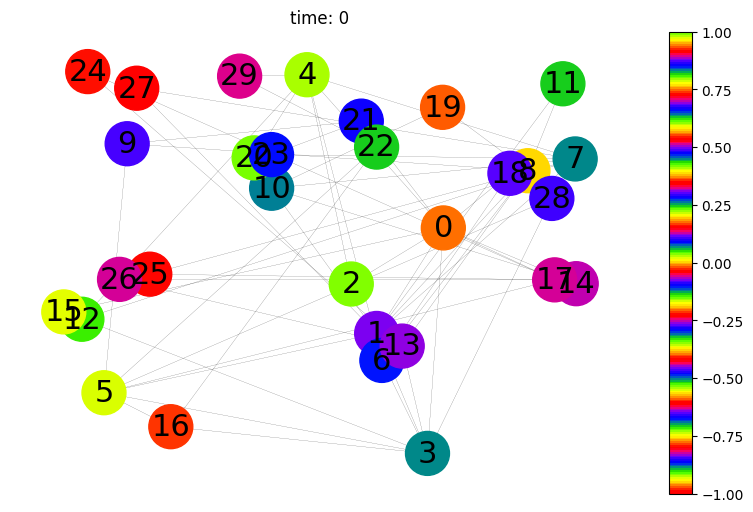

In [72]:
t = 0
#G = nx.erdos_renyi_graph(10,.25)
G = nx.barabasi_albert_graph(30,2)

#give all the nodes the property 'state', with value 0
nx.set_node_attributes(G, 0, 'state')

#initialize each state to be uniform random in [-1,1]
for i in G.nodes:
 G.nodes[i]['state'] = np.random.uniform(-1,1)

badDraw(G)  #<--- replace this with badDraw(G)

# Problem 2: Histograms (10 points)
Here's a basic histogram of the states in that network:

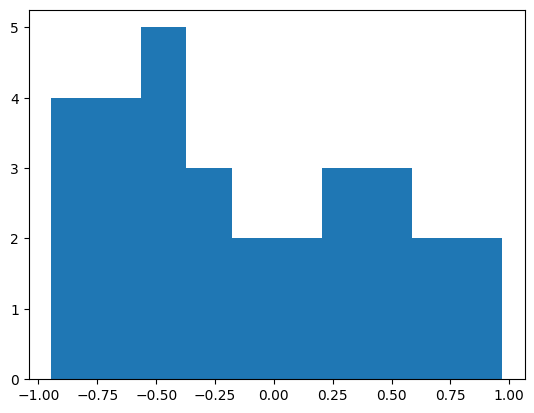

In [73]:
#plot a histogram of the positions
a = plt.hist(getStates(G))
#^^^ assigning to 'a' just suppresses printed output there
#could clean this histogram up, add title/axis labels/etc

Notice how basic that histogram is... Let's explore what we can do with that type of plot, since they're very useful for summarizing the state of a large population visually!
### a) (3 points) Set a parameter called `N`, and generate `N` random numbers spread uniformly between -1 and 1. (Use a `np.random` function and name the resulting array `Nums`). Generate a histogram of your results, just using the `plt.hist` function like above.
(still a good idea to assign the 'output' of the hist call to some dummy variable, to suppress the implicit printing that happens when you leave that command hanging unassigned)

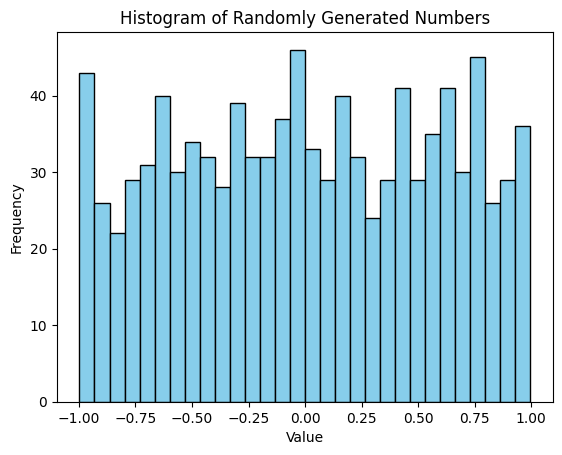

In [74]:
#<-- put your code for 2a here
N = 1000

Nums = np.random.uniform(-1, 1, N)

a = plt.hist(Nums, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Randomly Generated Numbers')
plt.show()

### b) (2 points) Run that code for various values of `N`. What do you notice as `N` gets larger? Why might this trend be relevant for us in the context of running simulations on varying populations of agents? (Hint: we'd like to uncover the underlying "trend" behind the distributions we see)

***Double click*** and write down your response here!

As N gets larger, we observe that the histogram start to look smoother and more like a uniform distribution.
A larger population often provides a more accurate representation of the underlying dynamics and trends. With a larger N number, the results of the simulation are more generalization and could be a manifestation of the law of large number. This states that as the sample size increases, the average of the sample values tends to approach the expected value of the underlying distribution, which in this case, represents the uniform distribution.

### c) (2 points) Make a histogram of `N` Gaussian random numbers instead using `np.random.normal(__,__,N)` (pick your favorite mean and standard deviation in those blanks), and make `N` big enough that you can see the classic "bell curve" shape.

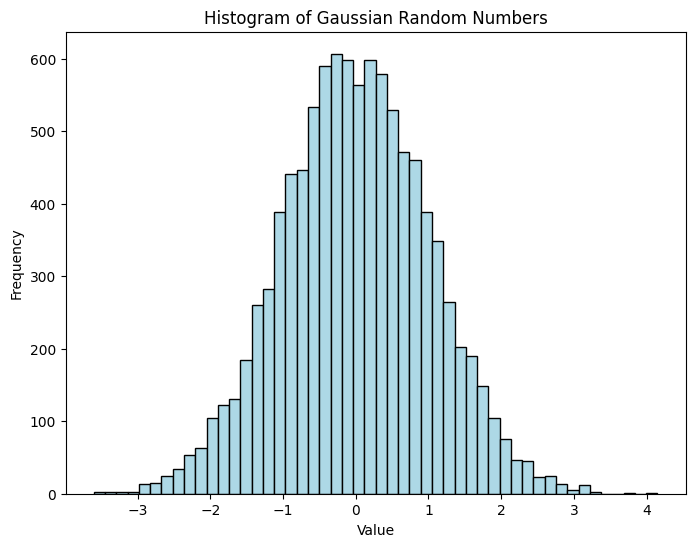

In [75]:
mean = 0
std_dev = 1
N_gaussian = 10000
gaussian = np.random.normal(mean, std_dev, N_gaussian)
plt.figure(figsize=(8, 6))
plt.hist(gaussian, bins=50, color='lightblue', edgecolor='black')
plt.title('Histogram of Gaussian Random Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


### d) (1 point) Now let's pretty it up a bit. Use `plt.hist(___, numbins, density = True)`.

The name of your array of random numbers goes in the blank.

`numbins` (which should be some number of your choice) denotes the number of bins you want to separate the population into. More bins will potentially make things look smoother, but only if there is sufficient population to fill out all those narrow bins.  (note: you can be fancier by defining custom, irregular bin edges if you provide a list or array here instead of a number, but there's no particular reason to do so in this case.

`density = True` scales the vertical axis so that it represents a ***probability density*** rather than a pure tally-count in each bin. Notice that this is intelligent enough to compensate for larger and smaller populations, and for wider and narrower bins!

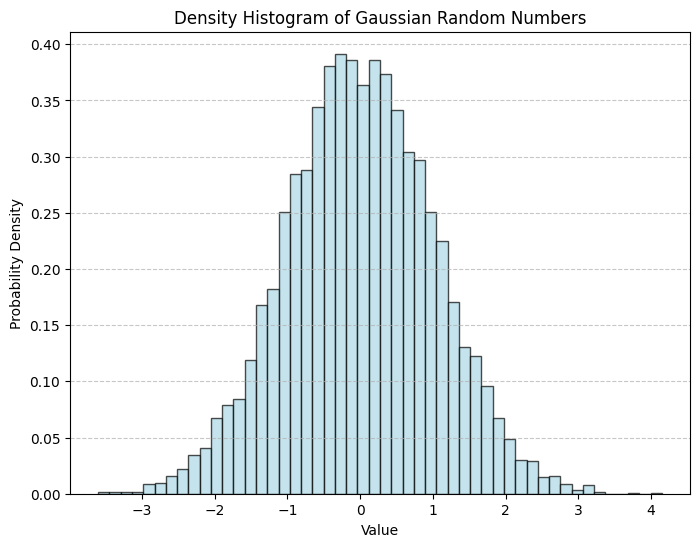

In [76]:
#<-- put your code for 2d here
numbins = 50
plt.figure(figsize=(8, 6))
plt.hist(gaussian, bins=numbins, density=True, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Density Histogram of Gaussian Random Numbers')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### e) (2 points) Finally, let's plot two histograms on the same plot, with different colors, representing what we'd do if we had two populations with different ideology distributions that we wanted to compare.
* Generate an array of normally-distributed numbers called `Dems` with mean -0.5 and standard deviation 0.25
* Generate another array called `Reps` with mean 0.3 and standard deviation 0.3.  
* Use two successive `np.hist` commands to plot each data set. Add the arguments `color = 'blue'` and `color = 'red'` respectively, as well as the argument `alpha = 0.75` to set them at 75% opacity so you can see through where they overlap.
* You can use `density = True` or not, your choice. But if you leave it out and prefer to plot raw numbers, the relative population sizes matter a lot, so keep them similar!
* Do that first for large enough populations that the distibutions are nicely smooth (in `figure(0)`), then for a smaller population (in `figure(1)`). This is how we display multiple plots, as opposed to overlaying multple graphs/histograms in the same plot.

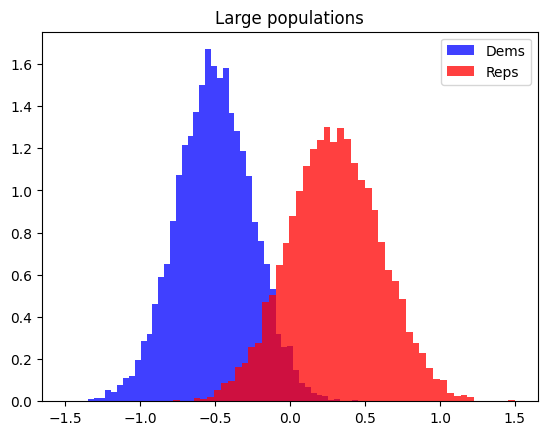

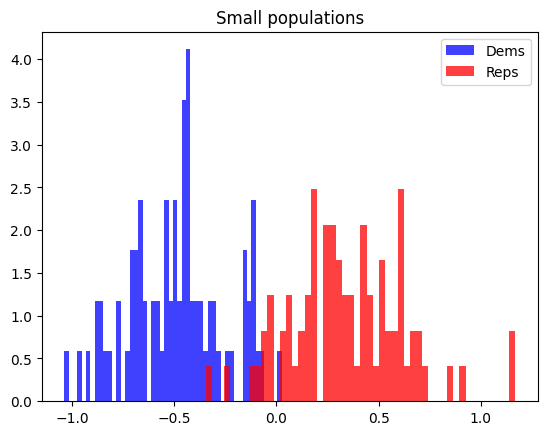

In [77]:

Dems_large = np.random.normal(-0.5, 0.25, 10000)
Reps_large = np.random.normal(0.3, 0.3, 10000)

plt.figure(0)
plt.hist(Dems_large, bins=50, color='blue', alpha=0.75, density=True, label='Dems')
plt.hist(Reps_large, bins=50, color='red', alpha=0.75, density=True, label='Reps')
plt.legend()
plt.title('Large populations')

Dems_small = np.random.normal(-0.5, 0.25, 80)
Reps_small = np.random.normal(0.3, 0.3, 80)

plt.figure(1)
plt.hist(Dems_small, bins=50, color='blue', alpha=0.75, density=True, label='Dems')
plt.hist(Reps_small, bins=50, color='red', alpha=0.75, density=True, label='Reps')
plt.legend()
plt.title('Small populations')

plt.show()


From the plots above, we observe that the histogram for small populataion is less smooth, making the distributions appear less consistent.

# Problem 3: Back to the Political Model (18 points)
Let's clean up the model from class a bit by packaging the main logical operations into their own functions. This is a good idea when the same actions will be taken in multiple situations (e.g., a node making a new random tie if it currently has none, OR if they've just broken one due to an 'argument'). First, I've encapsulated the codefor making a random tie, same as we had before:

In [78]:
#make a new random edge in G, involving the given node
def make_random_connection(index):
  global G

  neighbors = list(G.neighbors(index))

  notyetconnected = []
  for i in G.nodes:
    if i not in neighbors and i!=index:

      notyetconnected.append(i)

  connect_to = np.random.choice(notyetconnected)
  G.add_edge(index, connect_to)

I've made one change from the in-class version we had, to more closely match the standard implementation of these models: I'm editing `G` as I go ("asynchronous updating"), rather than creating and editing `newG` for a simultaneous/synchronous update. This means we have to be a bit more careful about the order that we make changes---so that we aren't re-making a tie we just broke, for instance.

With updating-as-we-go, the order we visit the nodes matters. In this case I'd rather not go ***full*** asynchronous/random and potentially choose the same node multiple times in a row, but I also don't want to systematically bias the behavior of the model by sweeping through in the same order every time.

So I would like to sweep through all nodes once each (in a **random** order) before hitting any of them again. We did this early on with the Ising model, but it was complicated a bit by the fact that we were sweeping over a 2D grid.

We'll use the `np.random.permutation` function, which takes a list or array as input, and ***returns*** a randomly reordered version of it, leaving the original untouched. You can grab that returned list by assigning a variable name to it, or you can just use it immediately inside a print statement or loop.
### a) (2 points) Write a snippet of code to print a random ordering of the node indices of a graph `G` (it can be the one named `G` that already exists in memory from Question 1, or you can make a new one)

In [79]:
#<-- put your code for 3a here
random_order = np.random.permutation(list(G.nodes))
print(random_order)

[23  6 13 16 21 20  5 19 27 25  9 22 18  0  2 26 12  8  7 10 14  4  3 24
 28 11 29 15 17  1]


Now let's define how interactions work, in their own functions. I want to break this down in a more systematic way, so we could be more flexible about altering the interaction rule.


I've included the piece-wise linear interaction that we ended up with in class. This crosses zero at `tolerance` and has a slope of `move_speed` or `-movespeed` everywhere.

In [80]:
def dstate_pw_linear(difference):
  global tolerance, move_speed
  #leftmost "down-slope" section
  if difference < -tolerance/2:
    return -move_speed*(difference + tolerance)

  #central "up-slope" region
  elif np.abs(difference)<=tolerance/2:
    return move_speed*difference

  #rightmost "down-slope" region
  elif difference > tolerance/2:
    return -move_speed*(difference - tolerance)


We can verify that this is doing what we want by plotting its output for a finely spaced range of distance values on the x axis.
* We'll use the useful function `np.linspace(a,b,n)` which gives an array that starts with `a` and ends with `b` and evenly splits the interval between into a vector `n` elements long.
* If we call a function on a numpy array of values, it will evaluate each value and return an array of those corresponding outputs.

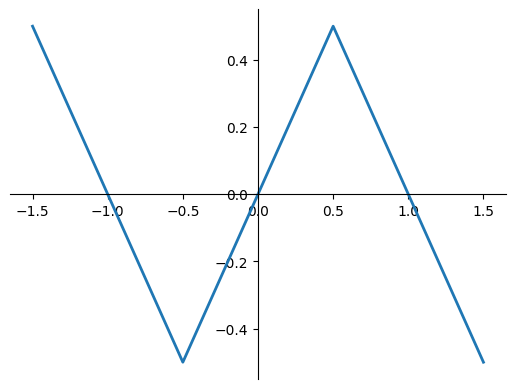

In [81]:
#run this!
tolerance = 1
move_speed = 1

xs = np.linspace(-1.5,1.5, 1000)

ys = []
for x in xs:
  ys.append(dstate_pw_linear(x))

#I need to do this to use the 'ax' object
fig, ax = plt.subplots()
#plot the function
plt.plot(xs, ys, linewidth=2)
#make the axes in the center. Matplotlib really doesn't like doing this more simply, for some reason...
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

### b) (3 points) As an alternative to that piecewise-linear interaction function, write the code to return the output of a cubic function with the same zero-crossing point `tolerance`, with vertical scaling multiplier `move_speed`. You can do this by multiplying together three terms that are zero at the desired places:
* `difference` to create the central zero at `difference = 0`
* `1 + difference/tolerance` to create the left zero at `difference = -tolerance`
* `1 - difference/tolerance` to create the left zero at `difference = tolerance`

(This should just be one or two lines of code, simpler than the piecewise-linear version.)

In [82]:
def dstate_cubic(difference):
  global tolerance, move_speed

  #<---put your code for 3b here!
  return move_speed * difference * (1 + difference/tolerance) * (1 - difference/tolerance)

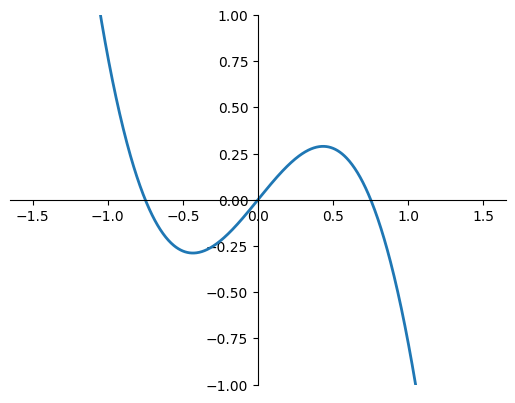

In [83]:
#run this to test your cubic function looks how you want
tolerance = 0.75
move_speed = 1

xs = np.linspace(-1.5,1.5, 1000)
ys = []
for x in xs:
  ys.append(dstate_cubic(x))

#I need to do this to use the 'ax' object
fig, ax = plt.subplots()
#plot the function
plt.plot(xs, ys, linewidth=2)
#make the axes in the center. Matplotlib really doesn't like doing this for some reason...
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
a = ax.set_ylim([-1,1]) #setting the vertical axis limits, since these cubic 'tails' go really far up and down and we still want to see detail near the origin where most interactions will be

### c) (3 points) Now let's also make a helper function to correct things if we end up outside the range `[-1,1]`. You can use multiple `if` statements like we did in class, or you can use a single `if` statement that utilizes the `np.abs` function and the `np.sign` function (which returns +1 if the input is positive and -1 if the input is negative).

In [84]:
#this function should check if this node's state is out of the [-1,1] bounds, and set it equal to the nearer bound if it is
def keep_in_bounds(index):
  global G

  if np.abs(G.nodes[index]['state']) > 1:
        G.nodes[index]['state'] = np.sign(G.nodes[index]['state'])
  #<---your code for 3c here

### d) (10 points) Clean up the update function using those functions:

In [85]:
#update each node's state, sweeping through in a random order
#concept: each node randomly interacts with a neighbor.
#If close enough, move toward each other
#If too far away, disconnect and make random connection and repel (with protection against leaving [-1,1])
def update():
  global G, tolerance, move_speed

  #reminder: G.nodes() gives a list of node indices
  nodeIndicesScrambled = np.random.permutation(list(G.nodes())) #<---how do we randomize the order of the indices?
  for index in nodeIndicesScrambled:  #<----loop over that order

    neighbors = list(G.neighbors(index))

    num_neighbors = len(neighbors)

    if num_neighbors == 0: #<--- check for the case where this node is isolated and has no neighbors
      make_random_connection(index) #<---(it should just make a random connection, as its only action)
    else: #the case when we have neighbors

      neighbor_index = np.random.choice(neighbors)

      neighbor_state = G.nodes[neighbor_index]['state']

      my_state = G.nodes[index]['state']

      #calculate the 'signed distance' from us to them
      difference = neighbor_state - my_state

      #calculate what the change in state should be for us (using signed distance to them)
      dstate = dstate_cubic(difference) #<---
      #and for them (using the sign-flipped version of 'difference', i.e. the signed distance to us)
      neighbor_dstate = dstate_cubic(-difference) #<---

      #update our state
      G.nodes[index]['state'] += dstate
      #and their state
      G.nodes[neighbor_index]['state'] += neighbor_dstate


      keep_in_bounds(index) #<--- use your keep_in_bounds function to handle the possibility that we left [-1,1]
      keep_in_bounds(neighbor_index)#<--- (you probably need to use it on the other person too)

      if np.abs(difference) > tolerance:  #<---check whether this interaction was repulsive
        make_random_connection(index)  #make a new connction *BEFORE* breaking the old one, since we're editing G itself but still don't want to connect to the person we're arguing with
        G.remove_edge(index, neighbor_index) #then remove the edge to the problematic neighbor


Finally, the running-code block looks the same as we had before. I'm going to package it into its own function:

In [86]:
def run(N=30, tolerance = 1, move_speed = 1):
  #^default parameters

  global G

  #any other parameters?

  #built-in Erdos-Renyi:
  # ave_num_neighbors = 3
  # p = ave_num_neighbors/(N-1)
  #G = nx.erdos_renyi_graph(N,p)

  #Barabasi-Albert: N nodes, each brings m edges to the network when it joins
  m = 2
  G = nx.barabasi_albert_graph(N, m)

  #Watts-Strogatz: N nodes, k nearest neighbor ring, p prob of rewiring
  #G = nx.watts_strogatz_graph(N,k,p)

  #create and initialize states randomly
  nx.set_node_attributes(G, 0, 'state')
  #initialize each state to be uniform random in [-1,1]
  for i in G.nodes:
    G.nodes[i]['state'] = np.random.uniform(-1,1)


  #max time
  T = 50
  #want to keep track of agreement/polarization over time (measured by population stdev)
  stdevs = np.zeros(T)
  stdevs[0] = np.std(getStates(G))

  #on each time step
  for t in range(1,T):
    update()
    display.clear_output(wait = True)
    myDraw(G,t)

    #display a histogram of the population
    plt.figure(1)
    plt.hist(getStates(G))

    #calculate the standard deviation of the population
    stdevs[t] = np.std(getStates(G))

    plt.figure(2)
    plt.plot(stdevs[:t+1],label = 'Standard Deviation', color ='lightgreen')
    plt.legend()

    plt.show()

    #if everyone agrees or everyone is at the extremes, the simulation is done
    if stdevs[t] < 10^-2 or stdevs[t] >= 1:
      break


I've packaged that master-code into a `run` function so we can use it for problem 4 as well. So let's call it and see if everything works!

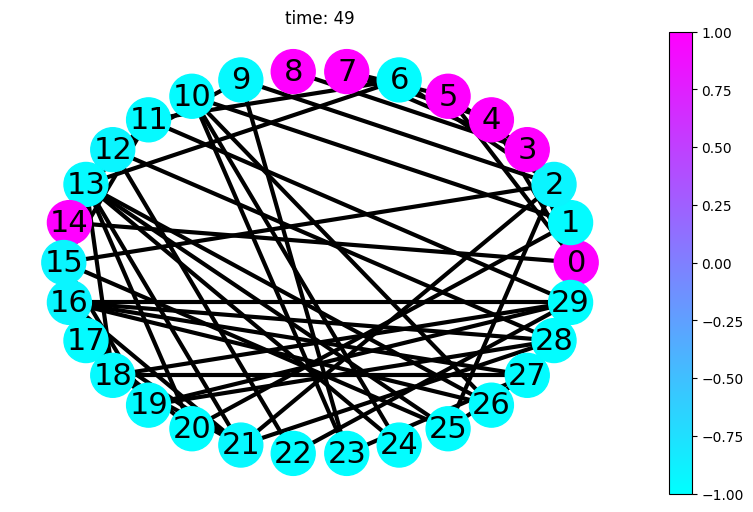

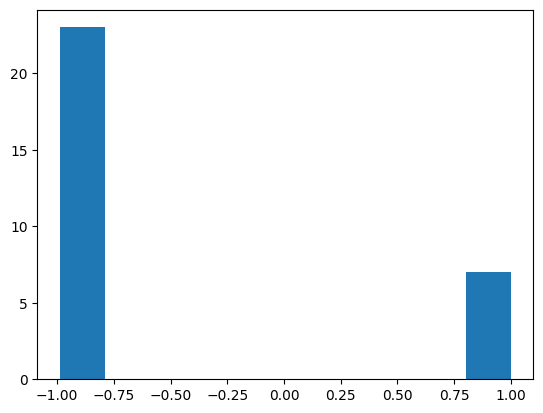

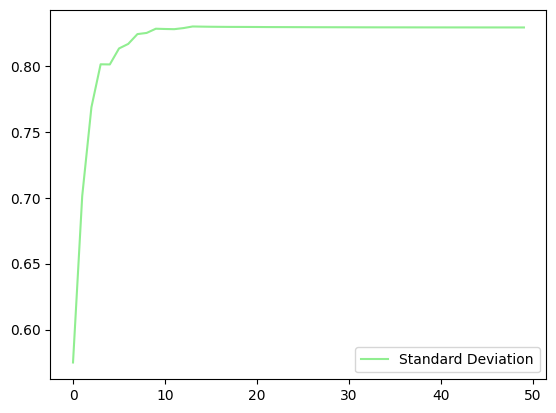

In [87]:
run()

# 4) Extensions (15 points, + extra credit)
### Implement at least three extensions, for example:
* Random noise on each interaction
* Soft-bounding (dampen movement as people approach the edges so they don't pile up at the extremes)
* Probabilistic tie-breaking (instead of 100% on each 'argument')
* Plotting more relevant information about the state of the system
* Running on different types of networks (generation algorithms commented out above), and comparing/discussing the results
* New ties are more likely to connect to friends-of-friends (triadic closure)
* Political party affiliations biasing initial states, with two (or more)-colored histogram showing their distributions
* Other feature(s) of your choice!

#**Don't put your changes into the code cells above! (That'd make it hard to separate from the previous questions' results)** Instead, **copy-paste any code-block you plan to alter** (like the `update` function or `run` function from above), and point out with comments where you made changes. If you don't change `run`, you can just call it after changing `update` or whatever else.

For each extra feature, explain (in a text cell) whether you think it would increase or decrease (or not affect) the tendency of the population to polarize, and why. Also, does this feature require more parameters, add any unforeseen complications, or beg for more features to go along with it? Run the simulation with your alterations and note any significant changes in behavior.

(***5 points per feature*** for the first three, ***3 points per extra feature*** up to +6 extra credit. If you'd like to do more than five features, though, feel free!)

In [104]:
#<---put your code for question 4 here (feel free to create more code cells, too)
def add_random_noise(difference):
    return difference + np.random.uniform(-0.1, 0.1)


In [105]:
def soft_bound(value):
    bound = 1
    bound_strength = 0.2
    if value > bound:
        return value - bound_strength * (value - bound)
    elif value < -bound:
        return value + bound_strength * (-bound - value)
    else:
        return value

In [106]:
def should_break_tie():
    break_probability = 0.8
    return np.random.uniform(0, 1) < break_probability

In [107]:
def update():
    global G, tolerance, move_speed

    nodeIndicesScrambled = np.random.permutation(list(G.nodes()))

    for index in nodeIndicesScrambled:
        neighbors = list(G.neighbors(index))
        num_neighbors = len(neighbors)

        if num_neighbors == 0:
            make_random_connection(index)
        else:
            neighbor_index = np.random.choice(neighbors)
            neighbor_state = G.nodes[neighbor_index]['state']
            my_state = G.nodes[index]['state']

            difference = add_random_noise(neighbor_state - my_state) ## add the random noise

            dstate = dstate_cubic(difference)
            neighbor_dstate = dstate_cubic(-difference)

            G.nodes[index]['state'] = soft_bound(G.nodes[index]['state'] + dstate)
            G.nodes[neighbor_index]['state'] = soft_bound(G.nodes[neighbor_index]['state'] + neighbor_dstate) ## add the soft bundle

            keep_in_bounds(index)
            keep_in_bounds(neighbor_index)

            if np.abs(difference) > tolerance and should_break_tie(): ## 80% chance to break the tie
                make_random_connection(index)
                G.remove_edge(index, neighbor_index)

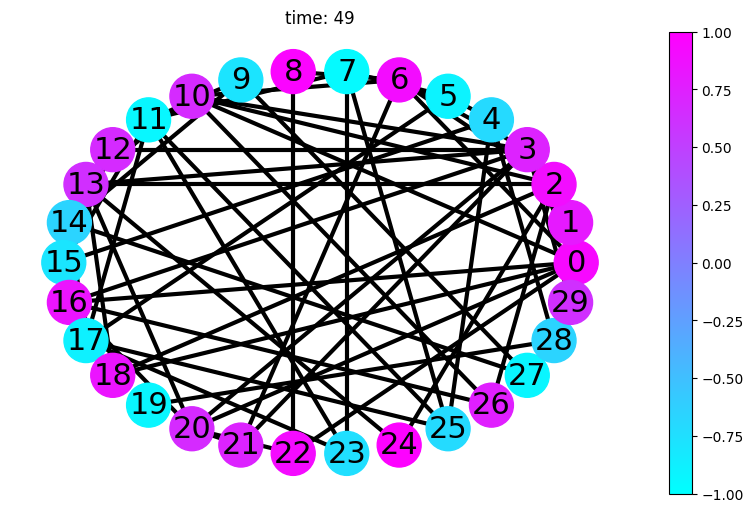

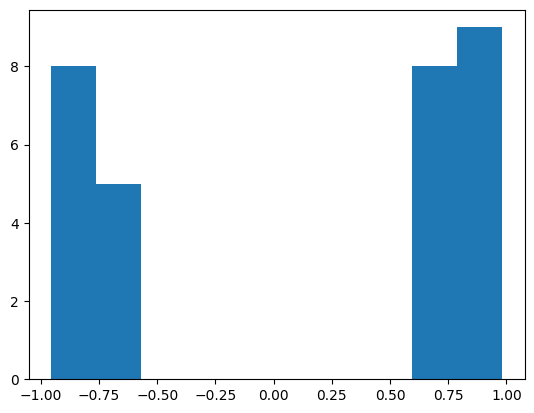

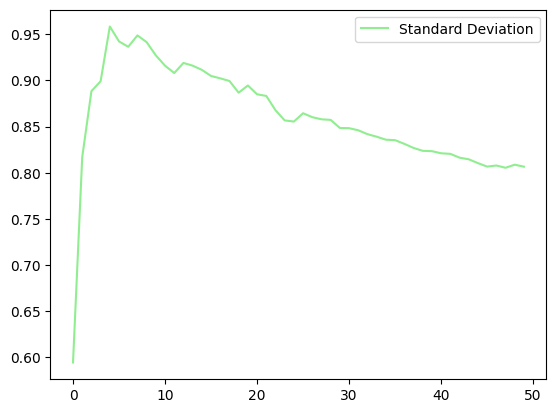

In [108]:
run()

**Double click** and add your text responses to Question 4 here!

By adding the noise on each interaction, we can observe the unpredictability in interactions. This feature makes the model less deterministic and less polarized by adding more randomness in our simulation. The new parameter is the magnitude of the noise.

By introducing soft-bundling, we prevent the states from piling up at the extreme values. It help decrease polarization because we it actively pushes individuals away from extremes. The new parameter is thestrength of the bounding effect.

We also set the tie-breaking probability to 0.8. Instead of breaking all the time, we introduce a probability factor which leads to more diverse interactions between values. This could either increase or decrease polarization depending on the probability value. If the ties are often maintained, nodes might not polarized fastly. The new parameter is the probability of breaking ties.

All the features above require more parameters and add some complexity to our model. However, these features also make the model more realistic and include more interactions between values.

More features:

In [110]:
def make_triadic_connection(index):
    global G
    neighbors = list(G.neighbors(index))
    friends_of_friends = [f for n in neighbors for f in G.neighbors(n) if f not in neighbors and f != index]
    if friends_of_friends:
        connect_to = np.random.choice(friends_of_friends)
    else:
        notyetconnected = [i for i in G.nodes if i not in neighbors and i != index]
        connect_to = np.random.choice(notyetconnected)
    G.add_edge(index, connect_to)

In [111]:
def create_watts_strogatz_graph(N, k, p):
    return nx.watts_strogatz_graph(N, k, p)

In [113]:
def update():
    global G, tolerance, move_speed

    nodeIndicesScrambled = np.random.permutation(G.nodes())
    for index in nodeIndicesScrambled:

        neighbors = list(G.neighbors(index))

        if not neighbors:
            make_triadic_connection(index) ## add triadic connection if not neighbors
        else:
            neighbor_index = np.random.choice(neighbors)
            neighbor_state = G.nodes[neighbor_index]['state']
            my_state = G.nodes[index]['state']

            difference = neighbor_state - my_state
            difference = add_random_noise(difference)

            dstate = dstate_cubic(difference)
            neighbor_dstate = dstate_cubic(-difference)

            G.nodes[index]['state'] = soft_bound(G.nodes[index]['state'] + dstate)
            G.nodes[neighbor_index]['state'] = soft_bound(G.nodes[neighbor_index]['state'] + neighbor_dstate)

            keep_in_bounds(index)
            keep_in_bounds(neighbor_index)

            if np.abs(difference) > tolerance and should_break_tie():
                make_triadic_connection(index)
                G.remove_edge(index, neighbor_index)





In [117]:
def run(N=30, tolerance=1, move_speed=1):
    global G

    # Parameters for Watts-Strogatz graph
    k = 4  # Each node is connected to k nearest neighbors
    p = 0.1  # The probability of rewiring each edge

    # Use Watts-Strogatz graph
    G = create_watts_strogatz_graph(N, k, p)

    # Initialize states randomly
    nx.set_node_attributes(G, 0, 'state')
    for i in G.nodes:
        G.nodes[i]['state'] = np.random.uniform(-1, 1)

    # Max time
    T = 50
    stdevs = np.zeros(T)
    avg_states = np.zeros(T)  # Array to store average states over time
    stdevs[0] = np.std(getStates(G))
    avg_states[0] = np.mean(getStates(G))  # Store initial average state

    for t in range(1, T):
        update()
        display.clear_output(wait=True)
        myDraw(G, t)

        # Display a histogram of the population
        plt.figure(1)
        plt.hist(getStates(G))

        # Calculate the standard deviation of the population
        stdevs[t] = np.std(getStates(G))
        avg_states[t] = np.mean(getStates(G))  # Store average state for this timestep

        plt.figure(2)
        plt.plot(stdevs[:t+1], label='Standard Deviation', color='lightgreen')
        plt.plot(avg_states[:t+1], label='Average State', color='purple')  # Plot average state
        plt.legend()

        plt.show()

        # If everyone agrees or everyone is at the extremes, the simulation is done
        if stdevs[t] < 10^-2 or stdevs[t] >= 1:
            break


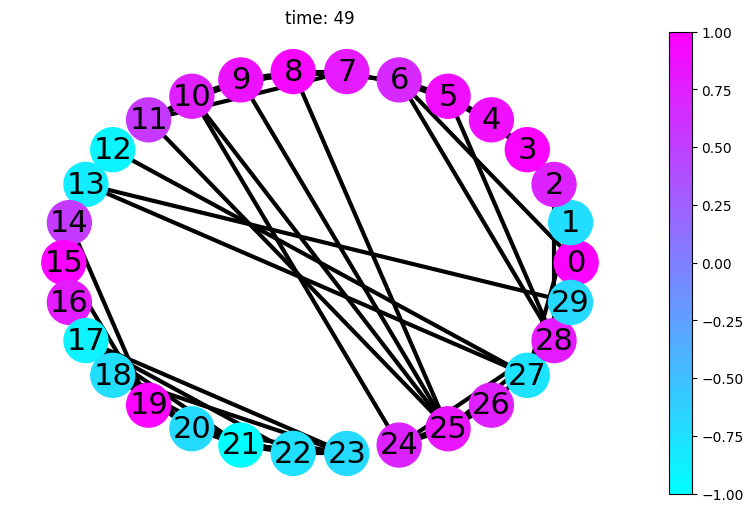

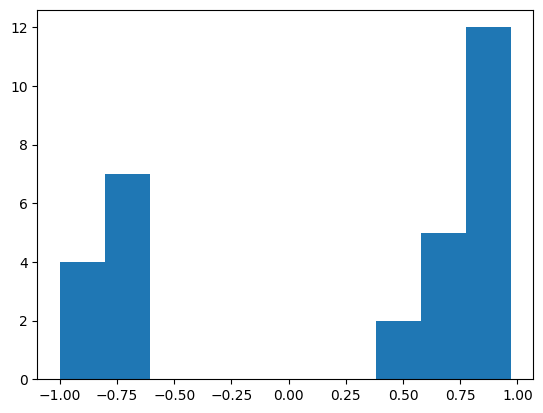

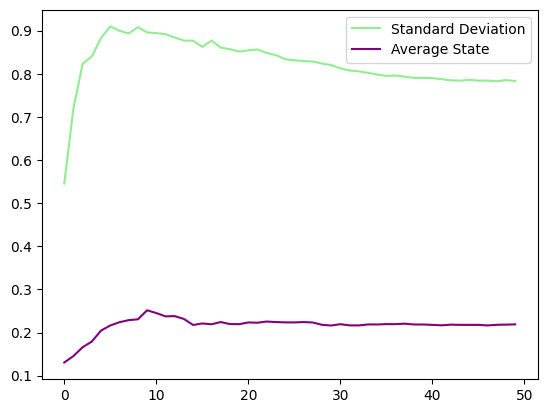

In [118]:
run()

We add the tradic closure instead of making completely random connections

Different network types can greatly affect the polarization. By initializing the network using the Watts-Strogatz, we observe that the graph can accelerate the spread of states with a small world properties. By varying the values of new parameters k (nearest neighbors in the ring) and p (rewiring probability), we can have different network structures and dynamics.

By adding the triadic closure, we connect it to friends of frends. Nodes are more likely to interact with nodes with similar states, decreasing the polarization and leading to the formation of clusters in the network. No additional parameters is added in this feature.

Plotting the average state does not have an effect on polarization. It provides a tool to help us better understand the overall tendency of population. If the average condition is approaching one of the extremes, the overall trend is shifting to that direction. If it stays close to zero, it implies a balance between  opposing values.